<a href="https://colab.research.google.com/github/JoyBis48/Object_Detection/blob/main/Vehicle_Detection_and_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cloning Yolov5 Repo and importing necessary libraries

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # Cloning the Yolov5 Github Repo
%cd yolov5
%pip install -qr requirements.txt  #Installing Dependencies

import torch
import utils
display = utils.notebook_init() #Performing Checks

YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/107.7 GB disk)


## Training Data

In [ ]:
# Training YOLOv5s on custom_coco128 for 3 epochs
!python train.py --img 640 --batch 2 --epochs 20 --data custom_coco128.yaml --weights yolov5s.pt --cache ram --cache disk

train: weights=yolov5s.pt, cfg=, data=custom_coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=disk, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v

## Detection 

In [ ]:
!python detect.py --weights /content/Vehicles_trained_weight.pt  --img 640 --conf 0.5 --source /content/video3-1min.mp4

detect: weights=['/content/Vehicles_trained_weight.pt'], source=/content/video3-1min.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1816) /content/video3-1min.mp4: 384x640 1 Car, 1 Number Plate, 1 Two Wheeler, 64.1ms
video 1/1 (2/1816) /content/video3-1min.mp4: 384x640 1 Car, 9.4ms
video 1/1 (3/1816) /content/video3-1min.mp4: 384x640 1 Car, 1 Two Wheeler, 8.3ms
video 1/1 (4/1816) /content/video3-1min.mp4: 384x640 1 Car, 1 Number Plate, 1 Two Wheeler, 7.

## Detection of a traffic image

In [ ]:
!python detect.py --weights /content/Vehicles_trained_weight.pt  --img 640 --conf 0.5 --source /content/Traffic_Image.jpg

detect: weights=['/content/Vehicles_trained_weight.pt'], source=/content/Traffic_Image.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Traffic_Image.jpg: 320x640 4 Cars, 2 Number Plates, 1 Blur Number Plate, 1 Two Wheeler, 1 Auto, 155.5ms
Speed: 0.9ms pre-process, 155.5ms inference, 0.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


## Displaying the detected image 

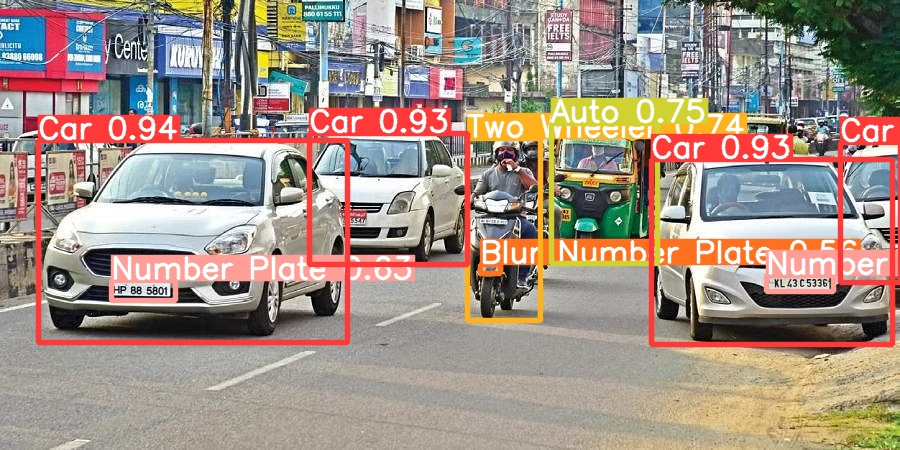

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/yolov5/runs/detect/exp/Traffic_Image.jpg')
cv2_imshow(img)

## Getting coordinates for the bounding boxes

In [ ]:

#Loading the model in a variable named model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/Vehicles_trained_weight.pt', force_reload=True) 

im = '/content/Traffic_Image.jpg'

# Inference
results = model(im)

# Results
results.print()  
results.xyxy[0]  # im predictions (tensor)
results.pandas().xyxy[0]

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 450x900 5 Cars, 2 Number Plates, 2 Blur Number Plates, 1 Two Wheeler, 1 Auto
Speed: 13.2ms pre-process, 168.6ms inference, 0.9ms NMS per image at shape (1, 3, 320, 640)


,xmin,ymin,xmax,ymax,confidence,class,name
0,37.623882,139.793228,346.938141,341.881317,0.938461,0,Car
1,651.490601,158.629105,891.604858,344.339447,0.927687,0,Car
2,309.222504,132.960175,466.792969,264.025543,0.926041,0,Car
3,840.499939,142.264938,900.000000,281.770752,0.780159,0,Car
4,551.067200,122.824570,657.127014,263.127136,0.752891,4,Auto
5,467.262543,137.808960,539.974365,320.275574,0.736703,3,Two Wheeler
6,110.701149,280.433807,175.437164,299.863312,0.629043,1,Number Plate
7,766.341919,275.033997,833.088684,291.256165,0.626862,1,Number Plate
8,479.700439,263.535645,500.105408,273.496704,0.561977,2,Blur Number Plate
9,850.461853,121.956619,884.122070,148.297348,0.447812,0,Car


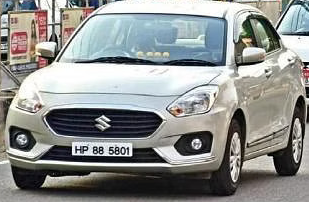

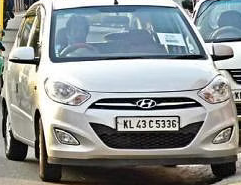

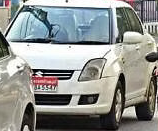

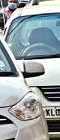

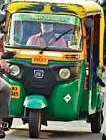

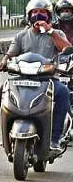

In [ ]:
from PIL import Image

pic = Image.open('/content/Traffic_Image.jpg') #displaying the original image

#defining the bounding box coordinates (neglecting rows having conf<0.6)
xmin0, ymin0, xmax0, ymax0 = (37.623882,	139.793228,	346.938141,	341.881317)
xmin1, ymin1, xmax1, ymax1 = (651.490601,	158.629105,	891.604858,	344.339447)
xmin2, ymin2, xmax2, ymax2 = (309.222504,	132.960175,	466.792969,	264.025543)
xmin3, ymin3, xmax3, ymax3 = (840.499939,	142.264938,	900.000000,	281.770752)
xmin4, ymin4, xmax4, ymax4 = (551.067200,	122.824570,	657.127014,	263.127136)
xmin5, ymin5, xmax5, ymax5 = (467.262543,	137.808960,	539.974365,	320.275574)
xmin6, ymin6, xmax6, ymax6 = (110.701149,	280.433807,	175.437164,	299.863312)
xmin7, ymin7, xmax7, ymax7 = (766.341919,	275.033997,	833.088684,	291.256165)


#cropping the image based on the coordinates
cropped_img0 = pic.crop((xmin0, ymin0, xmax0, ymax0))
cropped_img1 = pic.crop((xmin1, ymin1, xmax1, ymax1))
cropped_img2 = pic.crop((xmin2, ymin2, xmax2, ymax2))
cropped_img3 = pic.crop((xmin3, ymin3, xmax3, ymax3))
cropped_img4 = pic.crop((xmin4, ymin4, xmax4, ymax4))
cropped_img5 = pic.crop((xmin5, ymin5, xmax5, ymax5))
cropped_img6 = pic.crop((xmin6, ymin6, xmax6, ymax6))
cropped_img7 = pic.crop((xmin7, ymin7, xmax7, ymax7))

#displaying the cropped image
cropped_img0.show()
cropped_img1.show() 
cropped_img2.show() 
cropped_img3.show() 
cropped_img4.show() 
cropped_img5.show() 
cropped_img6.show() 
cropped_img7.show() 

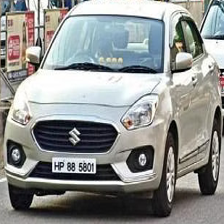

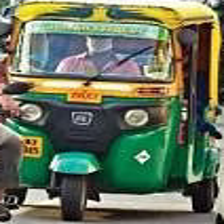

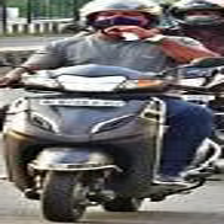

In [ ]:
#We wish to feature extract of all the unique objects that were detected in the traffic image. 
#Clearly , img0, img4, img5 are the unique objects (img 6 and img7 comes from a special class which is a unique feature itself)

# Defining the target size
target_size = (224, 224)

# Resizing the image
resized_img0 = cropped_img0.resize(target_size)
resized_img4 = cropped_img4.resize(target_size)
resized_img5 = cropped_img5.resize(target_size)
resized_img6 = cropped_img6.resize(target_size)
resized_img7 = cropped_img7.resize(target_size)

# Display the resized image
resized_img0.show()
resized_img4.show()
resized_img5.show()

## Performing Size Extraction

Aspect ratio0: 1.5297029702970297
Aspect ratio4: 0.7571428571428571
Aspect ratio5: 0.4010989010989011


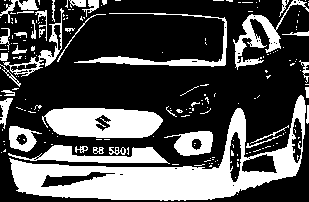

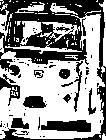

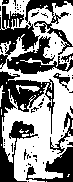

In [ ]:


#Convert the image to grayscale
img_gray0 = cropped_img0.convert('L')
img_gray4 = cropped_img4.convert('L')
img_gray5 = cropped_img5.convert('L')

# Thresholding the image to create a binary mask
threshold = 110
img_binary0 = img_gray0.point(lambda x: 255 if x > threshold else 0, '1')
img_binary4 = img_gray4.point(lambda x: 255 if x > threshold else 0, '1')
img_binary5 = img_gray5.point(lambda x: 255 if x > threshold else 0, '1')

# Inverting the binary mask
img_binary_inv0 = img_binary0.point(lambda x: 255 - x, '1')
img_binary_inv4 = img_binary4.point(lambda x: 255 - x, '1')
img_binary_inv5 = img_binary5.point(lambda x: 255 - x, '1')

# Get the width and height of the binary mask and calculating the aspect ratio
width0, height0 = img_binary_inv0.size
width4, height4 = img_binary_inv4.size
width5, height5 = img_binary_inv5.size

aspect_ratio0 = width0 / height0
aspect_ratio4 = width4 / height4
aspect_ratio5 = width5 / height5

# Printing the shape feature
print('Aspect ratio0: {}'.format(aspect_ratio0))
print('Aspect ratio4: {}'.format(aspect_ratio4))
print('Aspect ratio5: {}'.format(aspect_ratio5))

img_binary_inv0.show()
img_binary_inv4.show()
img_binary_inv5.show() 

## Performing Colour Extraction 

In [ ]:
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np


# Converting the image to a numpy array
img_array0 = np.array(resized_img0)
img_array4 = np.array(resized_img4)
img_array5 = np.array(resized_img5)

# Reshaping the array to a 2D shape
pixels0 = img_array0.reshape(-1, 3)
pixels4 = img_array4.reshape(-1, 3)
pixels5 = img_array5.reshape(-1, 3)

# Fitting a KMeans model to the pixels
kmeans0 = KMeans(n_clusters=1, random_state=0).fit(pixels0)
kmeans4 = KMeans(n_clusters=1, random_state=0).fit(pixels4)
kmeans5 = KMeans(n_clusters=1, random_state=0).fit(pixels5)

# Extracting the dominant color
dominant_color0 = kmeans0.cluster_centers_[0]
dominant_color4 = kmeans4.cluster_centers_[0]
dominant_color5 = kmeans5.cluster_centers_[0]

print('Dominant color0: RGB={}'.format(dominant_color0.astype(int)))
print('Dominant color4: RGB={}'.format(dominant_color4.astype(int)))
print('Dominant color5: RGB={}'.format(dominant_color5.astype(int)))


Dominant color0: RGB=[142 144 142]
Dominant color4: RGB=[103 114  91]
Dominant color5: RGB=[110 108 107]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


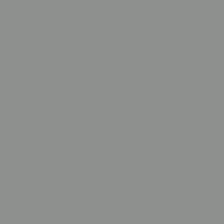

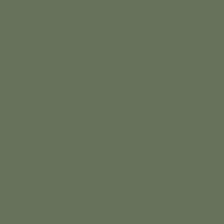

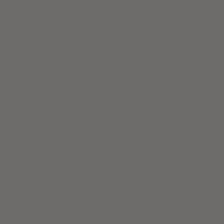

In [ ]:
#Displaying the RGB value from the previous output

dc0 = Image.new('RGB', (224,224), color = (142, 144, 142))
dc4 = Image.new('RGB', (224,224), color = (103, 114,  91))
dc5 = Image.new('RGB', (224,224), color = (110, 108, 107))
dc0.show()
dc4.show()
dc5.show()

## Unique Feature

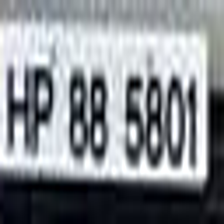

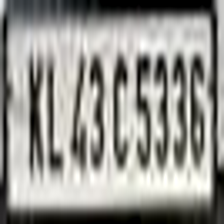

In [ ]:
#This is a unique feature extracted directly from the number plate class detetction by yolov5
resized_img6.show()
resized_img7.show()